<center><h5>OPEN DATA PROJECT</h5></center>


<center><h1>THEFT IN RESIDENTIAL DEVELOPMENTS</h1></center>

<center><h1>-</h1></center>

<center><small>ELIJAH ESMERO</small></center>

<center><img src="images/raw_sydney_map.png"></center>

<center><img src="images/edited_sydney_map.png"></center>

<center><img src="images/marsdenpark_annual_progression/map_20130816.png"></center>

<center><img src="images/marsdenpark_annual_progression/map_20190719.png"></center>

<center><img src="images/marsdenpark_theft_facebookposts/theft collage.png"></center>

<center><h1>DO SUBURBS EXPERIENCE MORE THEFT AS THEY ARE BEING DEVELOPED?</h1></center>

<center><h1>NUMBER OF HOUSES IN EACH SUBURB DURING EACH MONTH</h1></center>

<center><img src="images/land_value_data_webpage.png"></center>

The "DOWNLOADING LAND VALUE DATASET" section contains code which will download any missing monthly datasets between JULY 2017 - JULY 2019 from the valuergeneral.nsw.gov.au website. It utilises pathlib so that it is usable on both Windows and Mac computers.

In [1]:
# ==============================
# DOWNLOADING LAND VALUE DATASET
# ==============================

required_lv_zipfiles_list = [
 'LV_20170701.zip',
 'LV_20170801.zip',
 'LV_20170901.zip',
 'LV_20171001.zip',
 'LV_20171101.zip',
 'LV_20171201.zip',
 'LV_20180101.zip',
 'LV_20180201.zip',
 'LV_20180301.zip',
 'LV_20180401.zip',
 'LV_20180501.zip',
 'LV_20180601.zip',
 'LV_20180701.zip',
 'LV_20180801.zip',
 'LV_20180901.zip',
 'LV_20181001.zip',
 'LV_20181101.zip',
 'LV_20181201.zip',
 'LV_20190101.zip',
 'LV_20190201.zip',
 'LV_20190301.zip',
 'LV_20190401.zip',
 'LV_20190501.zip',
 'LV_20190601.zip',
 'LV_20190701.zip']

In [2]:
# ==============================
# DOWNLOADING LAND VALUE DATASET
# ==============================

import requests
from pathlib import Path

def download_files_if_not_downloaded(required_files_list, local_directory, base_url, glob_pattern):
    local_files_path_list = sorted(local_directory.glob(glob_pattern))
    local_files_list = [path.name for path in local_files_path_list]
    
    for required_file in required_files_list:
        if required_file not in local_files_list: 
            url = base_url + required_file

            # download file from url
            r = requests.get(url, stream = True)
            while True:
                if r.status_code is 200:
                    print("downloading " + required_file)
                    with open(local_directory / required_file,"wb") as f:
                        f.write(r.content)
                    break

    print("All required files are downloaded")

    
local_lv_directory = Path("data/land_value_data")

lv_base_url = "https://www.valuergeneral.nsw.gov.au/land_value_summaries/lvfiles/"

download_files_if_not_downloaded(required_lv_zipfiles_list,
                                 local_lv_directory,
                                 lv_base_url,
                                 "*.zip")

# revise paths of local zip files
local_lv_zipfile_path_list = sorted(local_lv_directory.glob("**/*.zip"))

All required files are downloaded


<center><img src="images/zipfile_extraction_size_difference.png"></center>

<center><img src="images/zipfile_contents.png"></center>

Each monthly data zipfile expands 10 times in size when uncompressed and contains 153 individual CSVs + 1 commons license txt file. So the computer's storage space isn't destroyed to make a pandas dataframes from these zipfiles, a function is used to concat all the CSVs in a zipfile without uncompressing it. The dtype_dict is a dictionary which states the data type of each column in the data, this speeds up the concat process as pandas does not have to waste resources guessing the data type of each value.

In [3]:
# ============================
# ACCESSING LAND VALUE DATASET
# ============================

dtype_dict={"DISTRICT CODE": int, 
            "DISTRICT NAME": str,
            "PROPERTY ID": int,
            "PROPERTY TYPE": str,
            "PROPERTY NAME": str,
            "UNIT NUMBER": str,
            "HOUSE NUMBER": str,
            "STREET NAME": str,
            "SUBURB NAME": str,
            "POSTCODE": float,
            "PROPERTY DESCRIPTION": str,
            "ZONE CODE": str,
            "AREA": float,
            "AREA TYPE": str,
            "BASE DATE 1": str,
            "LAND VALUE 1": float,
            "AUTHORITY 1": str,
            "BASIS 1": str,
            "BASE DATE 2": str,
            "LAND VALUE 2": float,
            "AUTHORITY 2": str,
            "BASIS 2": str,
            "BASE DATE 3": str,
            "LAND VALUE 3": float,
            "AUTHORITY 3": str,
            "BASIS 3": str,
            "BASE DATE 4": str,
            "LAND VALUE 4": float,
            "AUTHORITY 4": str,
            "BASIS 4": str,
            "BASE DATE 5": str,
            "LAND VALUE 5": float,
            "AUTHORITY 5": str,
            "BASIS 5": str,
            "Unnamed: 34": str}

In [4]:
# ============================
# ACCESSING LAND VALUE DATASET
# ============================

import zipfile
import pandas as pd

def concat_all_csv_in_zipfile_into_one_df(zipfile_path):
    with zipfile.ZipFile(zipfile_path) as zip:
        csv_in_zipfile_list = [name for name in zip.namelist() if name.endswith('.csv')] # to only get csv files
        df = pd.concat([pd.read_csv(zip.open(csv),
                                    encoding="ISO-8859-1",
                                    error_bad_lines=False,
                                    dtype=dtype_dict) for csv in csv_in_zipfile_list], sort=False)
    return df

lv_data_201907 = concat_all_csv_in_zipfile_into_one_df(local_lv_zipfile_path_list[-1])
lv_data_201907

,DISTRICT CODE,DISTRICT NAME,PROPERTY ID,PROPERTY TYPE,PROPERTY NAME,UNIT NUMBER,HOUSE NUMBER,STREET NAME,SUBURB NAME,POSTCODE,...,BASIS 3,BASE DATE 4,LAND VALUE 4,AUTHORITY 4,BASIS 4,BASE DATE 5,LAND VALUE 5,AUTHORITY 5,BASIS 5,Unnamed: 34
0,1,CESSNOCK,3017030,NORMAL,NaN,NaN,25,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
1,1,CESSNOCK,3017031,NORMAL,NaN,NaN,27,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
2,1,CESSNOCK,3017032,NORMAL,NaN,NaN,41,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
3,1,CESSNOCK,3017033,NORMAL,NaN,NaN,43,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,262000.0,14A(1),6A(1),01/07/2014,256000.0,14A(1),6A(1),NaN
4,1,CESSNOCK,3017034,NORMAL,NaN,NaN,45,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,252000.0,14A(1),6A(1),01/07/2014,247000.0,14A(1),6A(1),NaN
5,1,CESSNOCK,3017035,NORMAL,NaN,NaN,47,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,252000.0,14A(1),6A(1),01/07/2014,247000.0,14A(1),6A(1),NaN
6,1,CESSNOCK,3017036,NORMAL,NaN,NaN,49,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,252000.0,14A(1),6A(1),01/07/2014,247000.0,14A(1),6A(1),NaN
7,1,CESSNOCK,3017037,NORMAL,NaN,NaN,51,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,246000.0,14A(1),6A(1),01/07/2014,241000.0,14A(1),6A(1),NaN
8,1,CESSNOCK,3017038,NORMAL,NaN,NaN,53,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,246000.0,14A(1),6A(1),01/07/2014,241000.0,14A(1),6A(1),NaN
9,1,CESSNOCK,3017019,NORMAL,NaN,NaN,3,ECHIDNA CL,BELLBIRD,2325.0,...,6A(1),01/07/2015,234000.0,14A(1),6A(1),01/07/2014,229000.0,14A(1),6A(1),NaN


<center><h1>HOW DO I KNOW THAT THE LAND LISTING IS FOR A HOUSE?</h1></center>

Land value was the initial canditate to determine whether or not a land listing is for a house. The rationale was that the value of house land listings are between x and y dollar figures. However this is not the case as house land varies in cost depending on location i.e. land in Mosman or City of Sydney will be more expensive than land out west in Mount Druitt. Also land value fluctuates with the market hence will not provide an accurate estimate for house counts across different months.

- ## ~~LAND VALUE~~


Property name and land area were found to be more accurate fields to determine whether or not a land listing is a house. Land listings with a property name were found to be commercial or council properties such as ' BICENTENNIAL FLORA PARK' & ' KENDALL RESERVE'. This was futher investigated by comparing histograms of land area for listings with a property name versus those without. Those without a property name clustered around 700 m2 land area which is the standard house lot size in Sydney with millions of land listings in that cluster. Those with a property names were more spread out and only reached a max of 3000 in a bin. This makes sense as there are far more houses than commercial (and other) properties.

- ## PROPERTY NAME
- ## LAND AREA

In [6]:
# ===============================================
# DETERMINING CRITERIA FOR A HOUSE: PROPERTY NAME
# ===============================================

sorted(lv_data_201907["PROPERTY NAME"][~lv_data_201907["PROPERTY NAME"].isnull()].unique())

[' ',
 ' ACCESS, COMMON ROOM & LANDSCAPED AREA',
 ' ALBURY HIGH SCHOOL',
 ' ASSISTANT STATION MASTERS RESIDENCE',
 ' BABY HEALTH CENTRE',
 ' BICENTENNIAL FLORA PARK',
 ' BLOOMVALE',
 ' BOWRAL HIGH SCHOOL',
 ' BUILDING F',
 ' COOPER PARK (PART)',
 ' DEDICATED PUBLIC RESERVE',
 ' DEGOTARDI PARK',
 ' FARM 268',
 ' FEURBAIX',
 ' GHOST GUMS',
 ' GIRL GUIDES HALL',
 ' GREEN POINT OBSERVATORY',
 ' GUNDY & MAXWELLTON',
 ' HALL',
 ' HILDA GARDENS',
 ' JETTY ADJOINING',
 ' JOHN WRIGHT PARK',
 ' KARINYA',
 ' KENDALL RESERVE',
 ' KOORINGLE',
 ' KULOO',
 ' LOT 15 ',
 ' LT 1 ',
 " LUND'S",
 ' MCDONALDS',
 ' NANAMI',
 ' NATIONAL PARK',
 ' PART BUCKIE STATION',
 ' PART DENMAN GOLF COURSE',
 ' PART RAILWAY LANDS',
 ' PART TAYLORS PLAINS',
 ' PART WILGAROON',
 ' PSH BINDOGUNDRA',
 ' PT KINGSFORD SMITH PARK',
 ' R 65994 PART FRANCIS PARK  RERVE',
 ' RECREATION DR',
 ' RIVERSIDE THEATRE',
 ' SANDELL',
 ' SHOP 2.2',
 ' SITE 27',
 ' SITE 28',
 ' ST CUTHBERTS ANGLICAN CHURCH',
 ' STUCKEYS CREEK',
 ' TELEPHON

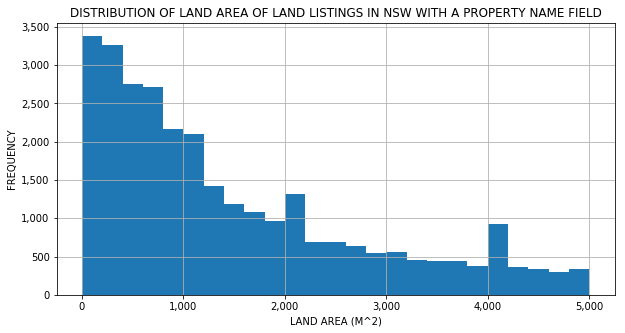

In [46]:
# ===========================================
# DETERMINING CRITERIA FOR A HOUSE: LAND AREA
# ===========================================

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))

lv_data_201907_area_hist = lv_data_201907["AREA"][(lv_data_201907["AREA TYPE"] == "M") & \
                                                  ~lv_data_201907["PROPERTY NAME"].isnull()].hist(range=(0,5000), bins=25)
plt.xlabel("LAND AREA (M^2)")
plt.ylabel("FREQUENCY")
plt.title("DISTRIBUTION OF LAND AREA OF LAND LISTINGS IN NSW WITH A PROPERTY NAME FIELD")


# format axes
lv_data_201907_area_hist.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
lv_data_201907_area_hist.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

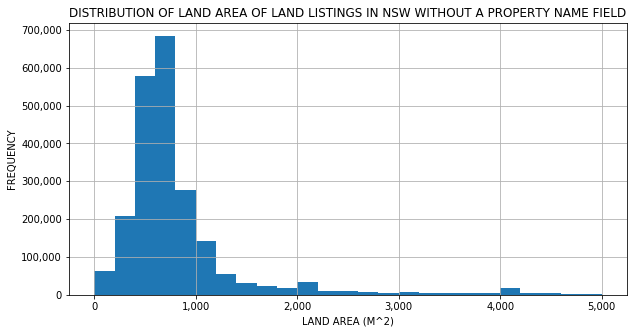

In [47]:
# ===========================================
# DETERMINING CRITERIA FOR A HOUSE: LAND AREA
# ===========================================

plt.figure(figsize=(10,5))

lv_data_201907_area_hist = lv_data_201907["AREA"][(lv_data_201907["AREA TYPE"] == "M") & \
                                                  lv_data_201907["PROPERTY NAME"].isnull()].hist(range=(0,5000), bins=25)
plt.xlabel("LAND AREA (M^2)")
plt.ylabel("FREQUENCY")
plt.title("DISTRIBUTION OF LAND AREA OF LAND LISTINGS IN NSW WITHOUT A PROPERTY NAME FIELD")

# format axes
lv_data_201907_area_hist.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
lv_data_201907_area_hist.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

A function was written to get the house counts of suburbs, filtering for land listings without a property name and a land area between 200m2 and 1000m2. This same function was applied to every monthly data set, generating a single dataframe. The data of Marsden Park was tested and the results match expectations and aerial mapping snapshots.

In [9]:
# ===================================
# AGGREGATING SUBURB HOUSE COUNT DATA
# ===================================

def get_suburb_house_count_from_lv_dataset(lv_dataset):
    suburb_house_count = lv_dataset[lv_dataset["PROPERTY NAME"].isnull() & \
                                                 (lv_dataset["AREA TYPE"] == "M") & \
                                                 (lv_dataset["AREA"] > 200) & \
                                                 (lv_dataset["AREA"] < 1000)].groupby("SUBURB NAME").count().max(axis=1)
    return suburb_house_count
    
get_suburb_house_count_from_lv_dataset(lv_data_201907)

SUBURB NAME
ABBOTSBURY           1132
ABBOTSFORD            866
ABERCROMBIE           197
ABERDARE              316
ABERDEEN              345
ABERGLASSLYN         1657
ABERMAIN              603
ABERNETHY              19
ACACIA CREEK            1
ACACIA GARDENS       1048
ADAMINABY             109
ADAMSTOWN            1983
ADAMSTOWN HEIGHTS    1880
ADELONG                68
ADJUNGBILLY             1
AFTERLEE                1
AGNES BANKS           110
AIRDS                1129
AKOLELE                50
ALBERT                  5
ALBION PARK          4168
ALBION PARK RAIL     2072
ALBURY               1920
ALDAVILLA              22
ALECTOWN                1
ALEXANDRIA            344
ALFORDS POINT         892
ALFREDTOWN              4
ALICE                   1
ALLAMBIE HEIGHTS     1960
                     ... 
YALLAROI                1
YALWAL                  1
YAMBA                2387
YANCO                  49
YANDERRA               26
YARRAGUNDRY             1
YARRAHAPINNI            8


In [10]:
# ===================================
# AGGREGATING SUBURB HOUSE COUNT DATA
# ===================================

import time

start_time = time.time()

# get the house count for all monthly data
NSW_suburb_house_count_df = pd.concat([get_suburb_house_count_from_lv_dataset(concat_all_csv_in_zipfile_into_one_df(local_zipfile)) \
                                       for local_zipfile in local_lv_zipfile_path_list], sort=False, axis=1)

elapsed_time = time.time() - start_time
print("This function took " + str(elapsed_time) + " seconds")

NSW_suburb_house_count_df

This function took 444.30868911743164 seconds


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
ABBOTSBURY,1130.0,1130.0,1130.0,1130.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,...,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0
ABBOTSFORD,864.0,864.0,864.0,864.0,864.0,864.0,864.0,864.0,864.0,864.0,...,865.0,865.0,865.0,864.0,864.0,864.0,864.0,866.0,866.0,866.0
ABERCROMBIE,184.0,184.0,184.0,184.0,196.0,196.0,196.0,196.0,196.0,196.0,...,196.0,196.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0
ABERDARE,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,314.0,...,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0,316.0
ABERDEEN,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,...,343.0,343.0,344.0,344.0,344.0,344.0,345.0,345.0,345.0,345.0
ABERGLASSLYN,1552.0,1582.0,1582.0,1582.0,1583.0,1601.0,1601.0,1601.0,1602.0,1602.0,...,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0,1657.0,1657.0
ABERMAIN,599.0,599.0,599.0,599.0,599.0,601.0,601.0,601.0,601.0,601.0,...,601.0,601.0,601.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0
ABERNETHY,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,...,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
ACACIA CREEK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACACIA GARDENS,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,...,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0


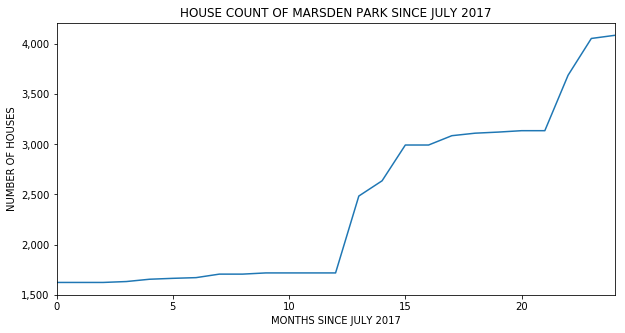

In [42]:
# ========================
# MARSDEN PARK HOUSE COUNT
# ========================

plt.figure(figsize=(10,5))

marsdenpark_house_count_timeseries_plot = NSW_suburb_house_count_df.loc["MARSDEN PARK"].plot()

# format graph
plt.xlabel("MONTHS SINCE JULY 2017")
plt.ylabel("NUMBER OF HOUSES")
plt.title("HOUSE COUNT OF MARSDEN PARK SINCE JULY 2017")
marsdenpark_house_count_timeseries_plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

<center><h1>NUMBER OF THEFTS IN EACH SUBURB FOR EACH MONTH</h1></center>

The same functions used to download and access the land value data were used to download and access the crime data. The crime data contains the monthly count for each crime category and crime category in the suburbs of NSW. The listings were filtered, keeping only listings with theft crimes related to houses. The data for marsden park was checked and the results again matched expectations. 

<center><img src="images/crime_data_webpage.png"></center>

In [12]:
# =========================
# DOWNLOADING CRIME DATASET
# =========================

required_crime_zipfile = ["SuburbData.zip"]

crime_local_directory = Path("data")

crime_base_url = "https://www.bocsar.nsw.gov.au/Documents/Datasets/"

download_files_if_not_downloaded(required_crime_zipfile,
                                 crime_local_directory,
                                 crime_base_url,
                                 "*.zip")

All required files are downloaded


In [13]:
# =======================
# ACCESSING CRIME DATASET
# =======================

NSW_crime_df = concat_all_csv_in_zipfile_into_one_df(crime_local_directory / required_crime_zipfile[0])
NSW_crime_df

,Suburb,Offence category,Subcategory,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,...,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
0,Aarons Pass,Homicide,Murder *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aarons Pass,Homicide,Attempted murder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aarons Pass,Homicide,"Murder accessory, conspiracy",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aarons Pass,Homicide,Manslaughter *,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aarons Pass,Assault,Domestic violence related assault,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Aarons Pass,Assault,Non-domestic violence related assault,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Aarons Pass,Assault,Assault Police,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Aarons Pass,Sexual offences,Sexual assault,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Aarons Pass,Sexual offences,"Indecent assault, act of indecency and other s...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Aarons Pass,Abduction and kidnapping,Abduction and kidnapping,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# ==============
# TYPES OF THEFT
# ==============

NSW_crime_df["Subcategory"][NSW_crime_df["Offence category"] == "Theft"].unique()

array(['Break and enter dwelling', 'Break and enter non-dwelling',
       'Receiving or handling stolen goods', 'Motor vehicle theft',
       'Steal from motor vehicle', 'Steal from retail store',
       'Steal from dwelling', 'Steal from person', 'Stock theft', 'Fraud',
       'Other theft'], dtype=object)

In [15]:
# ====================
# ISOLATING THEFT DATA
# ====================

NSW_theft_df = NSW_crime_df[NSW_crime_df["Subcategory"].str.contains("dwelling")].groupby("Suburb").sum()
NSW_theft_df

,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,Aug 1995,Sep 1995,Oct 1995,...,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
Suburb,,,,,,,,,,,,,,,,,,,,,
Aarons Pass,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Abbotsbury,2,2,1,0,1,1,2,0,1,0,...,5,0,1,1,1,0,0,0,1,1
Abbotsford,4,4,15,4,3,5,5,3,12,8,...,1,1,0,1,1,2,0,1,2,2
Abercrombie,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Abercrombie River,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aberdare,7,8,7,3,0,2,4,3,6,4,...,2,0,2,3,4,3,4,2,3,5
Aberdeen,5,1,3,2,2,2,3,1,1,2,...,0,1,3,4,1,0,3,3,1,2
Aberfoyle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aberglasslyn,0,0,0,2,1,0,1,0,1,3,...,4,3,7,3,3,3,5,7,5,1


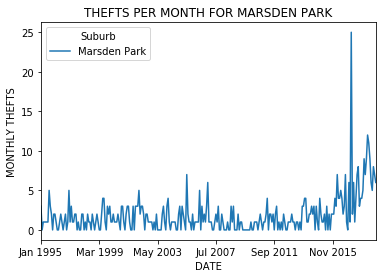

In [16]:
# ===================
# MARSDEN PARK THEFTS
# ===================

marsdenpark_theft_timeseries_plot = NSW_theft_df[NSW_theft_df.index == "Marsden Park"].transpose().plot()

# format graph
plt.xlabel("DATE")
plt.ylabel("MONTHLY THEFTS")
plt.title("THEFTS PER MONTH FOR MARSDEN PARK")
marsdenpark_house_count_timeseries_plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


<center><h1>NUMBER OF HOUSES IN EACH SUBURB FOR EACH MONTH</h1></center>
<center><h1>+</h1></center>
<center><h1>AMOUNT OF THEFTS IN EACH SUBURB FOR EACH MONTH </h1></center>

In [ ]:
# ===========================================
# CURRENT RESIDENTIAL DEVELOPMENTS TO TEST ON
# ===========================================

greenfield_development_suburb_list = ["BOX HILL",
                                      "COLEBEE",
                                      "MARSDEN PARK",
                                      "KELLYVILLE",
                                      "RIVERSTONE",
                                      "SCHOFIELDS",
                                      "ROUSE HILL",
                                      "VINEYARD",
                                      "SCHOFIELDS",
                                      "AUSTRAL",
                                      "CATHERINE FIELD",
                                      "EDMONDSON PARK",
                                      "LEPPINGTON",
                                      "ORAN PARK"]

In [17]:
# =====================
# ISOLATING 2018 THEFTS
# =====================

columns_to_drop = []

for column in NSW_theft_df.columns:
    if "2018" not in column:
        columns_to_drop.append(column)
        
NSW_2018_theft_df = NSW_theft_df.drop(columns_to_drop, axis=1)
NSW_2018_theft_df.index = [index.upper() for index in NSW_2018_theft_df.index] # index to uppercase to match house count data
NSW_2018_theft_df

,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
AARONS PASS,0,0,0,0,0,0,0,0,0,1,0,0
ABBOTSBURY,0,0,5,0,1,1,1,0,0,0,1,1
ABBOTSFORD,2,2,1,1,0,1,1,2,0,1,2,2
ABERCROMBIE,0,0,0,0,0,0,0,0,0,0,0,0
ABERCROMBIE RIVER,0,0,0,0,0,0,0,0,0,0,0,0
ABERDARE,6,4,2,0,2,3,4,3,4,2,3,5
ABERDEEN,1,4,0,1,3,4,1,0,3,3,1,2
ABERFOYLE,0,0,0,0,0,0,0,0,0,0,0,0
ABERGLASSLYN,3,0,4,3,7,3,3,3,5,7,5,1
ABERMAIN,1,0,3,1,4,5,1,3,2,3,1,4


In [18]:
# ===========================
# ISOLATING 2018 HOUSE COUNTS
# ===========================

NSW_2018_suburb_house_count_df = NSW_suburb_house_count_df.drop(list(range(6)), axis=1)
NSW_2018_suburb_house_count_df = NSW_2018_suburb_house_count_df.drop(list(range(18, 25)), axis=1)
NSW_2018_suburb_house_count_df.columns = NSW_2018_theft_df.columns
NSW_2018_suburb_house_count_df

,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
ABBOTSBURY,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0,1132.0
ABBOTSFORD,864.0,864.0,864.0,864.0,864.0,864.0,864.0,864.0,864.0,865.0,865.0,865.0
ABERCROMBIE,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,196.0,197.0
ABERDARE,314.0,314.0,314.0,314.0,314.0,314.0,314.0,316.0,316.0,316.0,316.0,316.0
ABERDEEN,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,343.0,344.0
ABERGLASSLYN,1601.0,1601.0,1602.0,1602.0,1606.0,1606.0,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0
ABERMAIN,601.0,601.0,601.0,601.0,601.0,601.0,601.0,601.0,601.0,601.0,601.0,601.0
ABERNETHY,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
ACACIA CREEK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACACIA GARDENS,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0,1048.0


In [257]:
# ==========================================================
# CREATING A FUNCTION TO SHOW SUBPLOTS OF CORRELATION GRAPHS
# ==========================================================

import numpy as np
from scipy import stats

def round_up_to_nearest_multiple_of_factor(x, f):
    if x % f == 0:
        return int(x)
    else:
        return int(x/f)*f + f

def scatter_plot_suburb_crime_house_count(suburb_list, no_of_columns):
    # determining fig and subplot dimensions
    no_of_rows = round_up_to_nearest_multiple_of_factor(len(suburb_list)/no_of_columns, no_of_columns)
    fig_width = 25
    subplot_width = fig_width/no_of_columns
    subplot_height = (2/3) * subplot_width  # maintains a 3:2 width-height aspect ratio
    fig_height = no_of_rows * subplot_height
    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = fig.add_gridspec(no_of_rows, no_of_columns)
    
    # create each sub plot through a loop
    current_row = 0
    current_column = 0
    
    for suburb in suburb_list:
        s1 = NSW_2018_theft_df.loc[suburb].rename("CRIMES")
        s2 = NSW_2018_suburb_house_count_df.loc[suburb].rename("HOUSE COUNT")

        df1 = pd.concat([s1, s2], axis=1, sort=False)
        plot1 = df1.plot.scatter("HOUSE COUNT", "CRIMES", ax=fig.add_subplot(gs[current_row, current_column]))

        # add polynomial n=2 trendline
        z = np.polyfit(s2, s1, 2)
        p = np.poly1d(z)
        trendline_xrange = np.linspace(int(s2.min()), int(s2.max()), num=50)
        plot1.plot(trendline_xrange, p(trendline_xrange), "r--")

        # format
        plt.title(suburb + " (p = " + "{:.2f})".format(stats.pearsonr(s2, s1)[0]))
        
        # go to next row once current row is filled
        current_column += 1
        if current_column == no_of_columns:
            current_column = 0
            current_row += 1
            
    plt.subplots_adjust(wspace=0.3, hspace=0.5)  # add space between subplots

C:\Users\elija\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RankWarning: Polyfit may be poorly conditioned


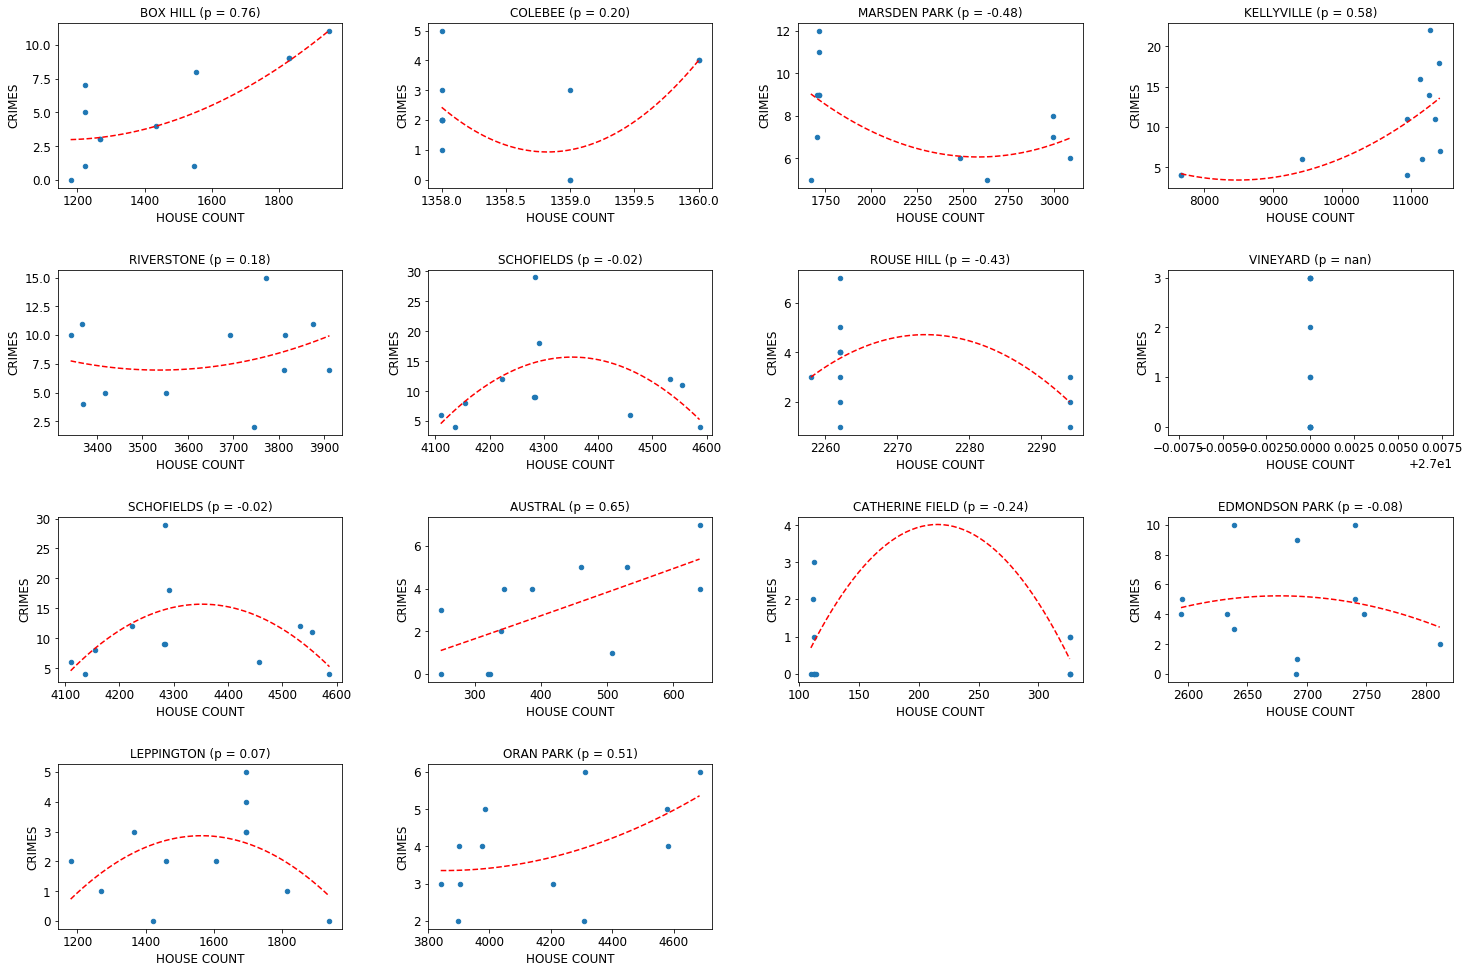

In [378]:
# =========================================
# CORRELATION GRAPHS OF THEFT VS HOUSECOUNT
# =========================================

scatter_plot_suburb_crime_house_count(greenfield_development_suburb_list, 4)

<center><h1>ATTEMPTING TO ANSWER THE QUESTION IN A DIFFERENT WAY... VISUALLY</h1></center>

In [21]:
# =======================================
# ALL BEN'S CODE FROM THE MAPPING LECTURE
# =======================================

import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

shp_file_name = "NSW_LOCALITY_POLYGON_shp/NSW_LOCALITY_POLYGON_shp.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = ("https://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
                 "5e295412-357c-49a2-98d5-6caf099c2339/download/nsw_locality_polygon_shp.zip")

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()
    
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)

burbs.index = burbs["NSW_LOCA_2"]

def add_centroid(row):
    return row.geometry.centroid

burbs["CENTROID"] = burbs.apply(add_centroid, axis=1)

loading from file
done


In [267]:
# =================================
# MAKE COLOUR MAP OF THEFT IN BURBS
# =================================

def plot_data_series_for_burbs_close_to_specific_burb(specific_burb, distance, target_df, source_series, dataset_name):
    column_name = dataset_name + " - " + source_series.name
    
    # import source_series value into target_df for indices which are present in both
    for idx in target_df.index:
        if idx in source_series.index:
            target_df.loc[idx, column_name] = source_series[idx]
        else:
            target_df.loc[idx, column_name] = 0
    target_df[column_name] = target_df[column_name].replace(np.nan, 0)
    
    # get distance of all burb centroids to specific_burb centroid
    specific_burb_centroid = burbs.loc[specific_burb, "CENTROID"]
    burbs["distance_from_" + specific_burb] = burbs.geometry.distance(specific_burb_centroid)
    
    # only show burbs within a certain distance of specific_burb
    close_burbs = burbs[burbs["distance_from_" + specific_burb] < distance]
    close_burbs.plot(column=column_name, cmap='cool', legend=True)
    
    for idx, row in close_burbs.iterrows():
        plt.annotate(s=idx, 
                     xy=tuple(row.CENTROID.coords)[0],
                     horizontalalignment='center')
    
    plt.title(specific_burb + " - " + column_name.upper())

C:\Users\elija\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1800x1080 with 0 Axes>

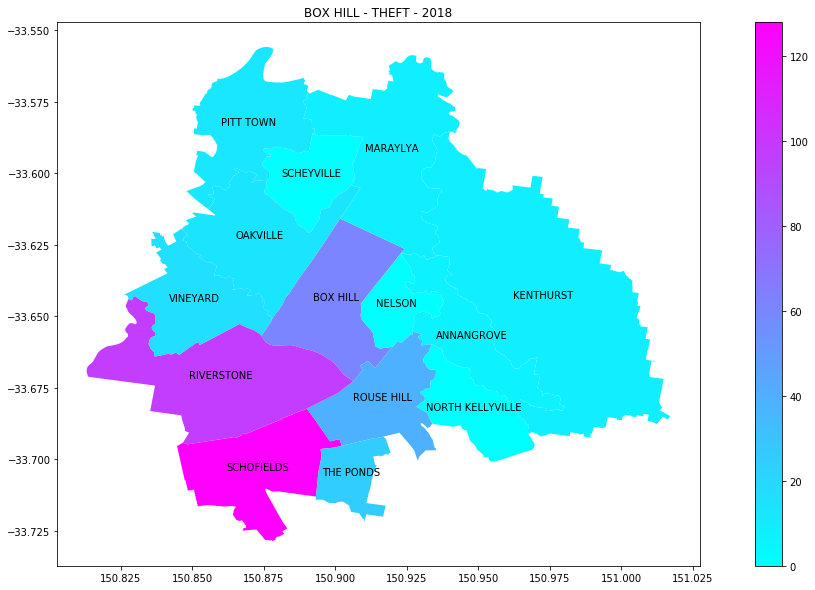

<Figure size 1800x1080 with 0 Axes>

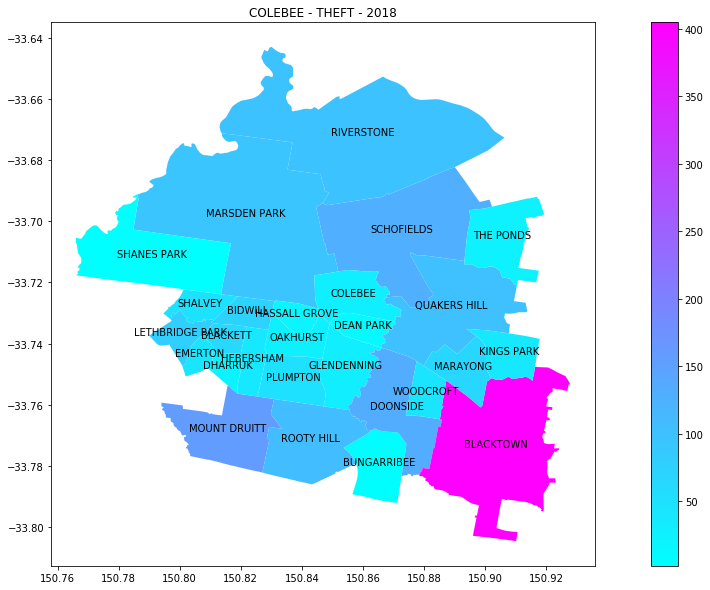

<Figure size 1800x1080 with 0 Axes>

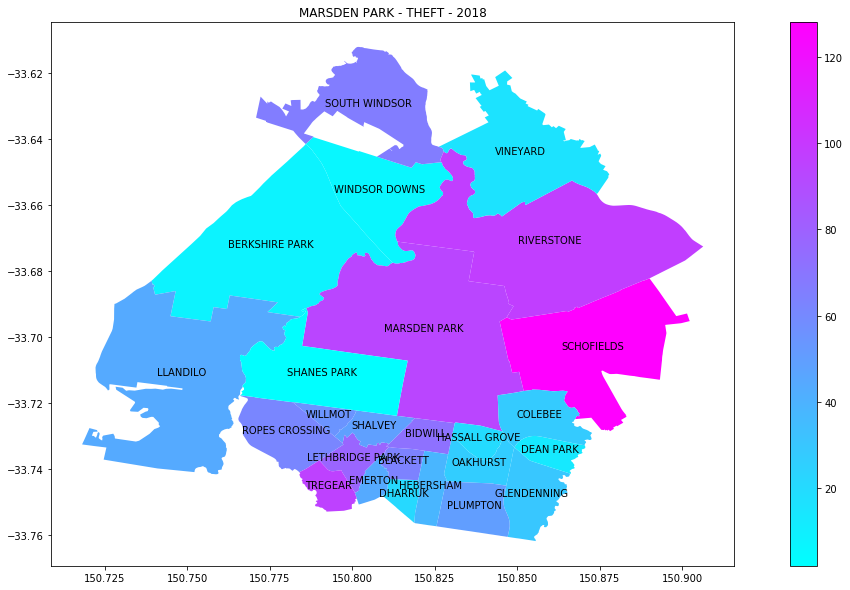

<Figure size 1800x1080 with 0 Axes>

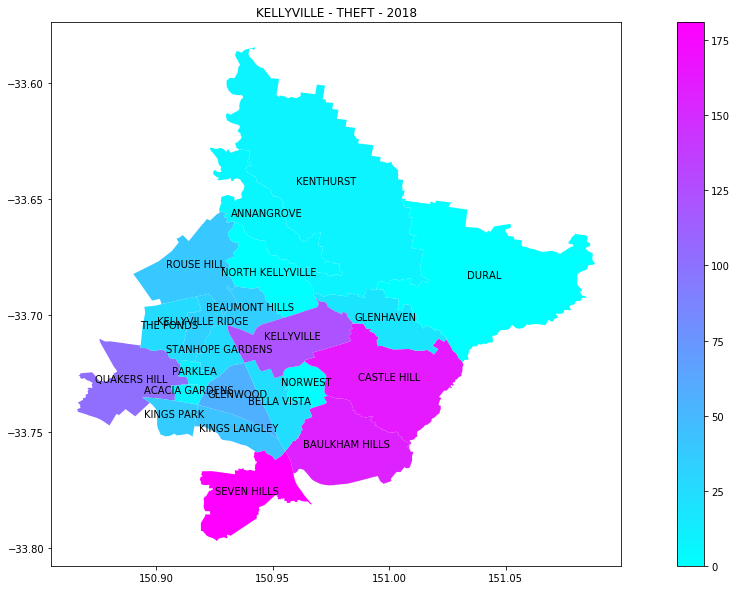

<Figure size 1800x1080 with 0 Axes>

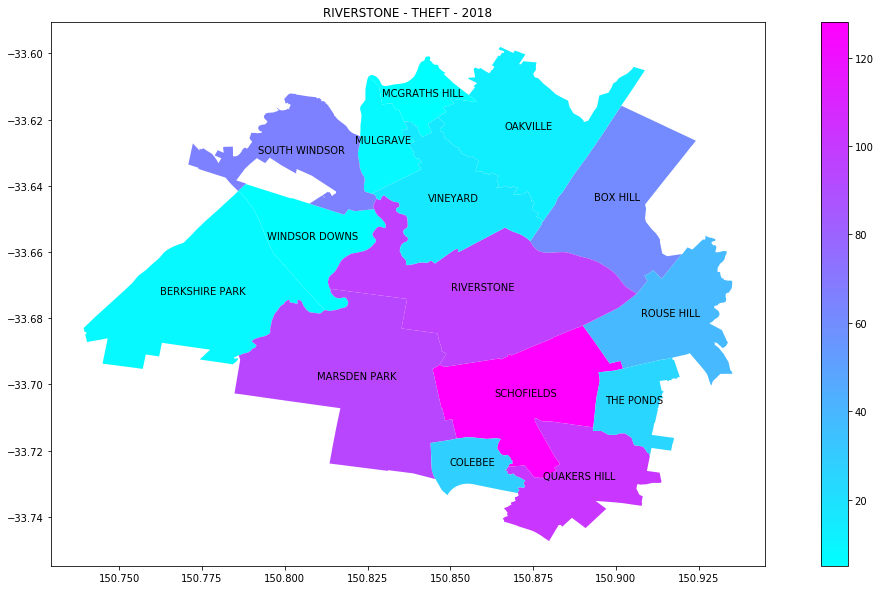

<Figure size 1800x1080 with 0 Axes>

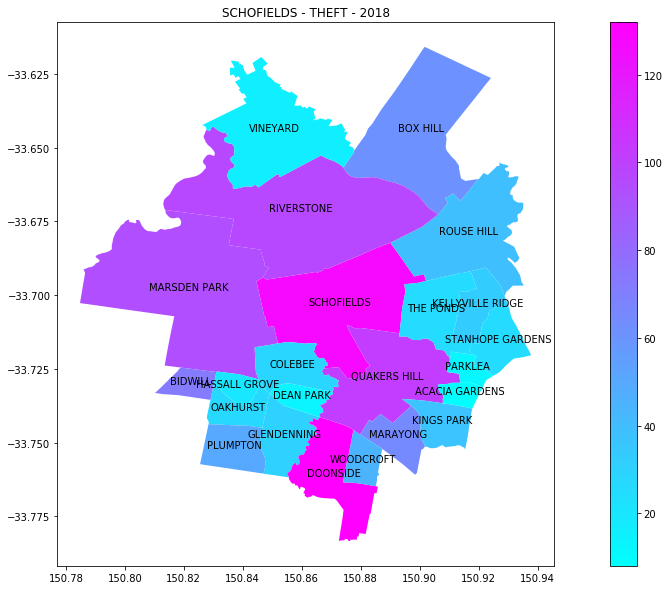

<Figure size 1800x1080 with 0 Axes>

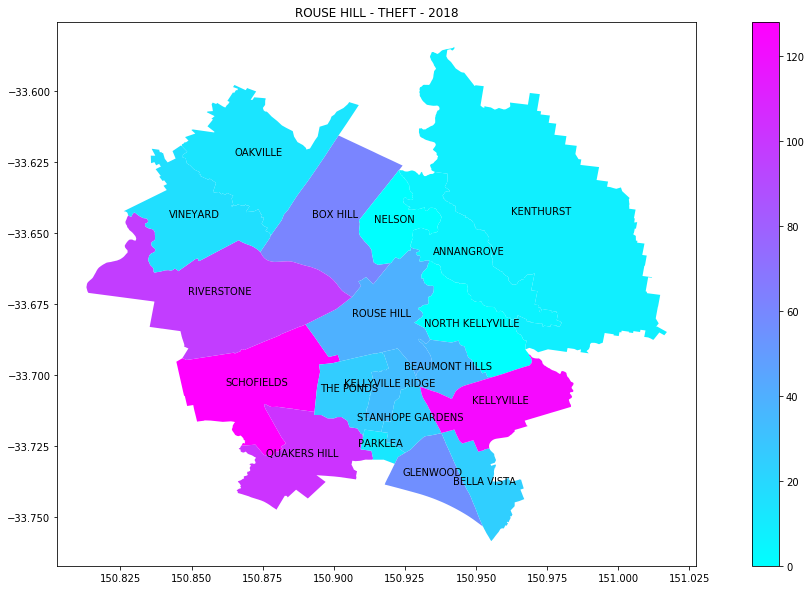

<Figure size 1800x1080 with 0 Axes>

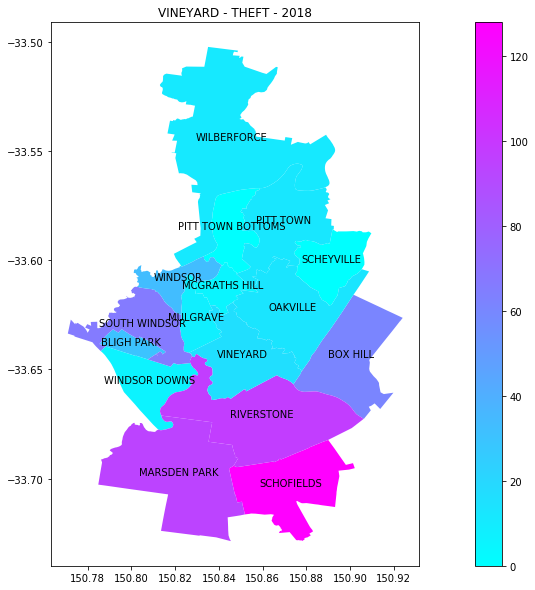

<Figure size 1800x1080 with 0 Axes>

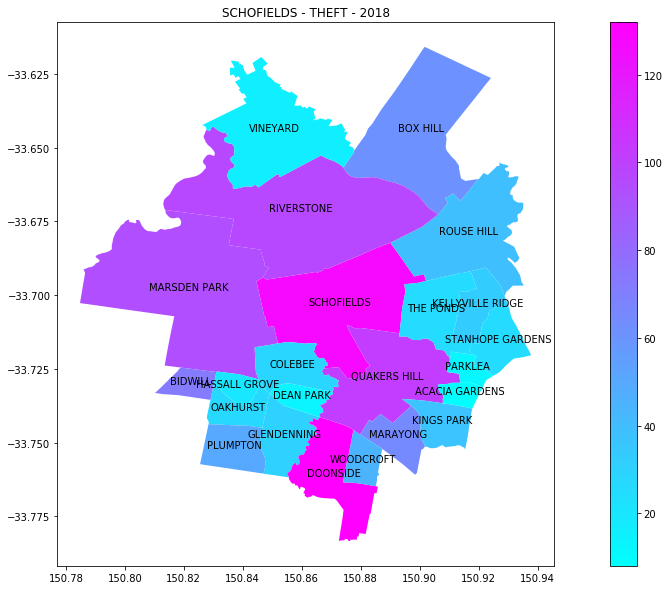

<Figure size 1800x1080 with 0 Axes>

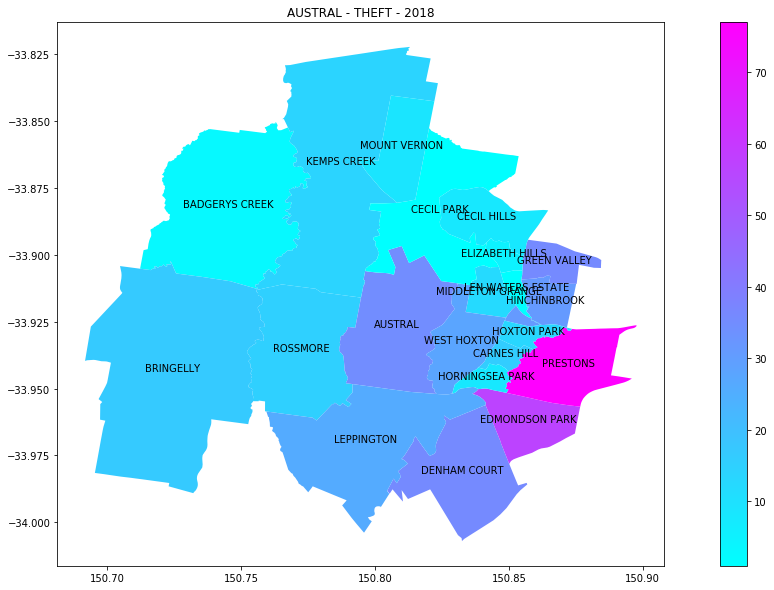

<Figure size 1800x1080 with 0 Axes>

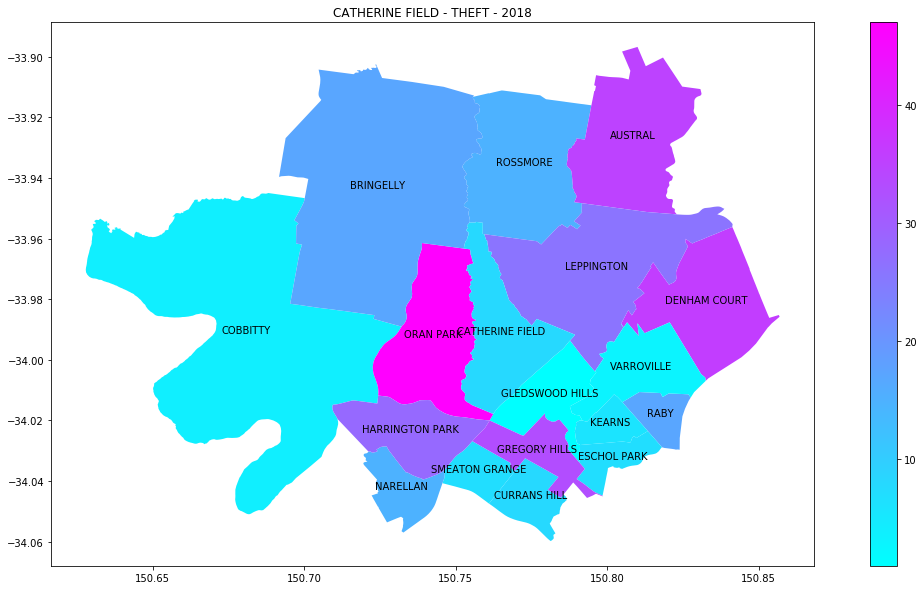

<Figure size 1800x1080 with 0 Axes>

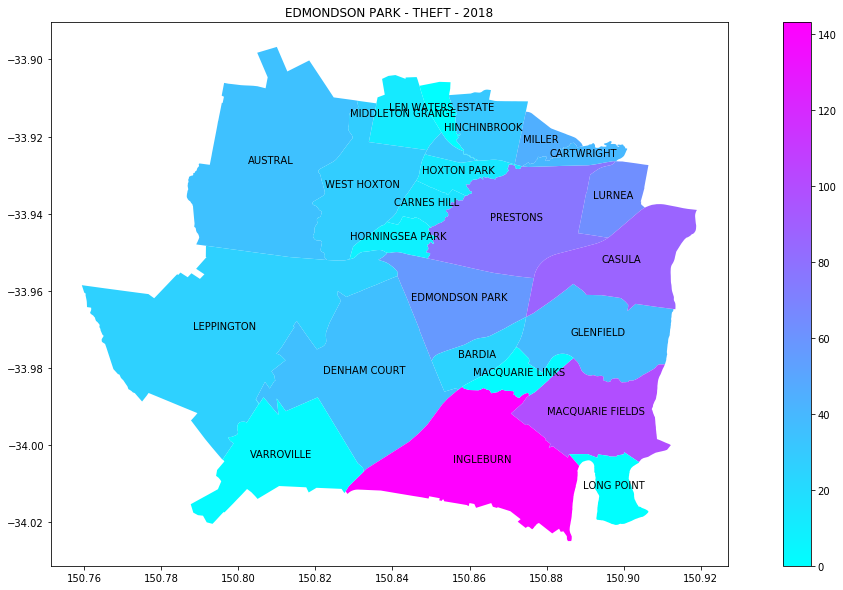

<Figure size 1800x1080 with 0 Axes>

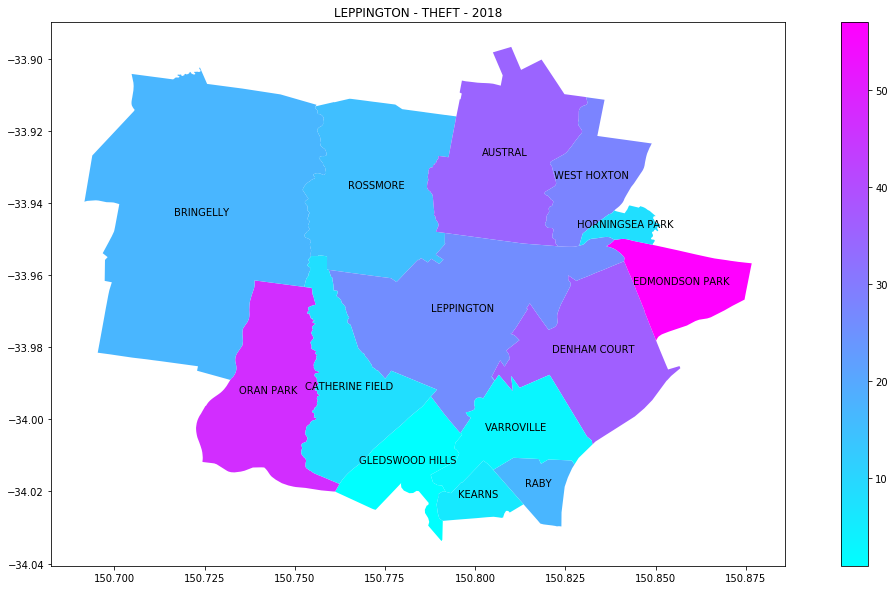

<Figure size 1800x1080 with 0 Axes>

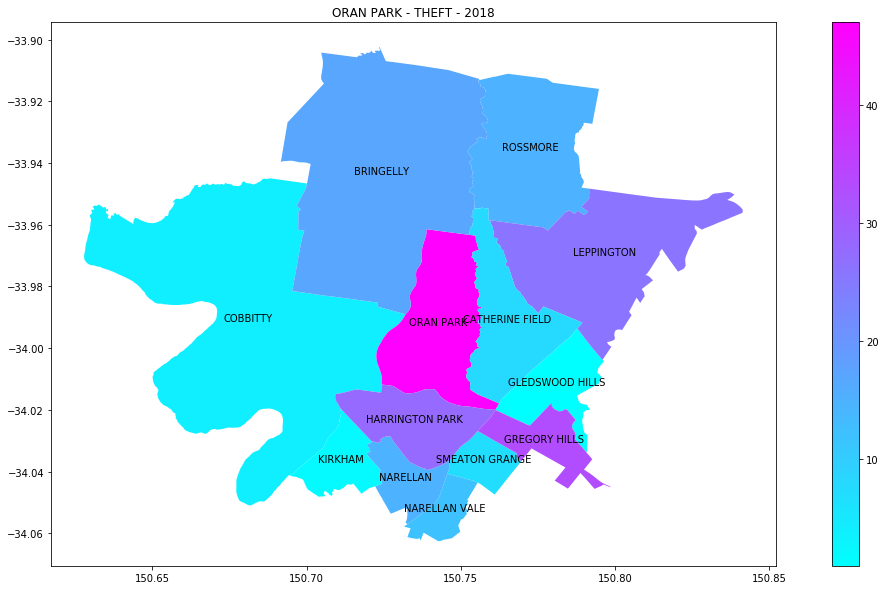

In [268]:
# =================================
# MAKE COLOUR MAP OF THEFT IN BURBS
# =================================

for greenfield_development_suburb in greenfield_development_suburb_list: 
    plot_data_series_for_burbs_close_to_specific_burb(greenfield_development_suburb, 
                                                      0.05, 
                                                      burbs, 
                                                      NSW_2018_theft_df.sum(axis=1).rename("2018"), 
                                                      "THEFT")

# CONCLUSIONS

- "THEFT PER HOUSE" IN A SUBURB __DOES NOT__ SEEM TO INCREASE AS THE NUMBER OF HOUSES INCREASES

- WOULD NEED MORE MONTHLY DATA AND CASES OF RESIDENTIAL DEVELOPMENTS TO PROVE DEFINITIVELY

- PERCEPTION BIAS PLAYS A ROLE

# OTHER INTERESTING THINGS

In [284]:
# ======================================
# MOST VALUABLE SUBURBS IN TERMS OF LAND
# ======================================

lv_data_201907.groupby("SUBURB NAME").sum()["LAND VALUE 1"].sort_values(ascending=False).head(10)

SUBURB NAME
SYDNEY            2.445533e+10
MOSMAN            1.930646e+10
CASTLE HILL       1.314679e+10
STRATHFIELD       1.193109e+10
MAROUBRA          1.075473e+10
RANDWICK          1.047051e+10
MARRICKVILLE      1.025467e+10
BAULKHAM HILLS    9.122157e+09
CHATSWOOD         8.966371e+09
VAUCLUSE          8.707087e+09
Name: LAND VALUE 1, dtype: float64

In [382]:
# =========
# DOOF DOOF
# =========

pd.set_option("display.max_columns", 50)
penrith_data = NSW_crime_df[:][(NSW_crime_df["Subcategory"].str.contains("ecstasy") == True) & \
                               (NSW_crime_df["Suburb"] == "Penrith")].sum()
month_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
penrith_month_data = pd.DataFrame(list(range(12)))
penrith_month_data.index = month_list

penrith_data[penrith_data.index.str.contains("Mar")].sum()

for i in range(12):
    penrith_month_data.loc[month_list[i], 0] = penrith_data[penrith_data.index.str.contains(penrith_month_data.index[i])].sum()


Text(0.5, 1.0, 'TOTAL AMOUNT OF ECSTASY-RELATED CRIMES IN PENRITH SINCE JAN 1995 FOR EACH MONTH OF THE YEAR')

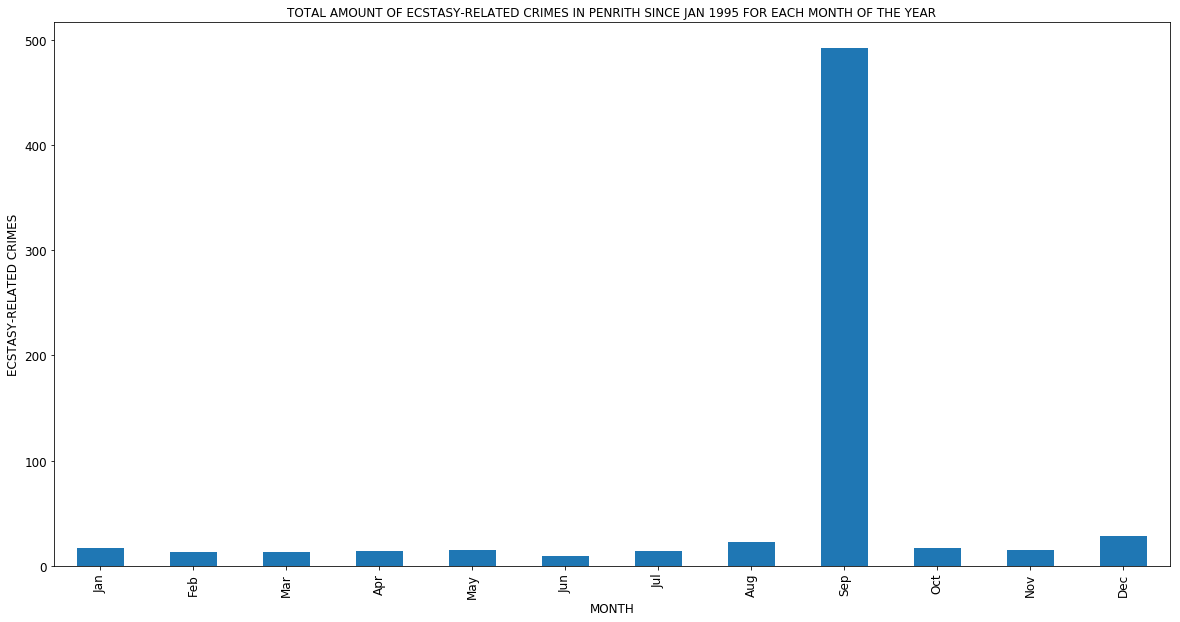

In [386]:
# =========
# DOOF DOOF
# =========

penrith_month_data.plot.bar(legend=False)
plt.xlabel("MONTH")
plt.ylabel("ECSTASY-RELATED CRIMES")
plt.title("TOTAL AMOUNT OF ECSTASY-RELATED CRIMES IN PENRITH SINCE JAN 1995 FOR EACH MONTH OF THE YEAR")

<center><h1>THANKS!</h1></center>